In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing and cleaning up column indices for ease of use
tran = pd.read_csv('data/transfusion.csv')
tran.columns = ['months_since_last', 'total_times_donated', 'total_cc_blood_donated', 'months_since_first', 'donated_march_2007']
tran = tran.reindex(columns=['months_since_first', 'months_since_last', 'total_times_donated', 'total_cc_blood_donated', 'donated_march_2007'])

In [3]:
# Getting a visual feel for the data
tran.head()

,months_since_first,months_since_last,total_times_donated,total_cc_blood_donated,donated_march_2007
0,98,2,50,12500,1
1,28,0,13,3250,1
2,35,1,16,4000,1
3,45,2,20,5000,1
4,77,1,24,6000,0


### What's the distribution of the dependent variable (donated_march_2007)?

We're trying to figure out how to predict if someone will return to donate more blood given previous history. Let's start by looking at how many individuals returned as a whole.

In [4]:
tran.donated_march_2007.mean()

0.23796791443850268

It looks like about 23.8% of individuals recorded returned in March 2007.

### How much blood do people donate on average? Do people donate a different amount each time?

We only have so much blood in out bodies. We can't give it all away. Let's see what the mean total blood donated is and if people donate a set amount of blood each visit.

In [5]:
tran.total_cc_blood_donated.mean()

1378.6764705882354

Text(0, 0.5, 'Frequency')

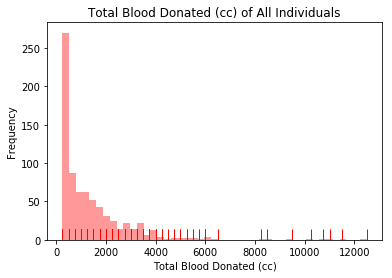

In [6]:
sns.distplot(tran.total_cc_blood_donated, kde=False, rug=True, color='red')
plt.title('Total Blood Donated (cc) of All Individuals')
plt.xlabel('Total Blood Donated (cc)')
plt.ylabel('Frequency')

In [7]:
per_visit = tran.total_cc_blood_donated / tran.total_times_donated
per_visit.mean()

250.0

In [8]:
per_visit.nunique()

1

Between everyone, an average person will donate about 1378.68 cc's of blood over the course of all their visits. When looking at the histogram, we see a heavily skewed distribution. The rugplot at the bottom shows each individual data point to get a better sense of the density, and it looks like it's evenly spaced so it's likely there is a set amount of blood donated each time. Checking that shows 250 cc's are donated during a donation visit. Therefore, total blood donated is just a product of the frequency of visits.

### What's the average time since the first visit of both returners and non-returners? The last visit?

Since total blood donated is just a product of frequency of visits, we're going to focus on the time focused data. Let's first look at the differences in means between the full sample, those who donated in March 2007, and those who didn't.

In [9]:
# Subsetting into two sets, those who returned and those who didn't
tran_2007 = tran[tran.donated_march_2007 == 1]
tran_no2007 = tran[tran.donated_march_2007 == 0]

In [10]:
# Full sample mean of time since the first visit
first_mean_sample = tran.months_since_first.mean()
first_mean_sample

34.282085561497325

In [11]:
# Of those who returned
first_mean_2007 = tran_2007.months_since_first.mean()
first_mean_2007

32.71910112359551

In [12]:
# And of those who didn't return
first_mean_no2007 = tran_no2007.months_since_first.mean()
first_mean_no2007

34.77017543859649

In [13]:
# Full sample mean of time since the last visit
last_mean_sample = tran.months_since_last.mean()
last_mean_sample

9.506684491978609

In [14]:
# Of those who returned
last_mean_2007 = tran_2007.months_since_last.mean()
last_mean_2007

5.455056179775281

In [15]:
# And of those who didn't
last_mean_no2007 = tran_no2007.months_since_last.mean()
last_mean_no2007

10.771929824561404

There does seem to be a difference here, but a more thorough statistically analysis is needed to find the significance. We also need to look at the calculated frequency statistic.

### How often do people donate on average?

The frequency of visits could be an indicator. Let's calculate that statistic.

In [16]:
tran['frequency'] = tran.months_since_first / tran.total_times_donated
freq_mean_sample = tran.frequency.mean()
freq_mean_sample

8.710694981406952

Text(0, 0.5, 'Frequency')

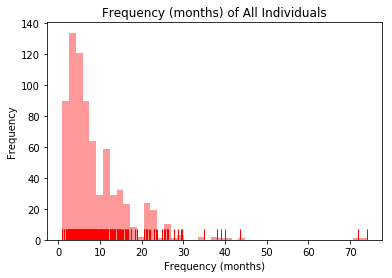

In [17]:
sns.distplot(tran.frequency, kde=False, rug=True, color='red')
plt.title('Frequency (months) of All Individuals')
plt.xlabel('Frequency (months)')
plt.ylabel('Frequency')

In general, individuals return about every 8.71 months. The distribution is relatively skewed though.

In [18]:
tran[tran.frequency > 50]

,months_since_first,months_since_last,total_times_donated,total_cc_blood_donated,donated_march_2007,frequency
499,74,74,1,250,0,74.0
747,72,72,1,250,0,72.0


### What's the average frequency of those who donated in March 2007? Those who didn't?

There could be a difference in frequency between those who donated in March 2007 and those who didn't. Let's take a look.

In [19]:
# Subsetting into two sets, those who returned and those who didn't. Now with a frequency column.
tran_2007 = tran[tran.donated_march_2007 == 1]
tran_no2007 = tran[tran.donated_march_2007 == 0]

In [20]:
freq_mean_2007 = tran_2007.frequency.mean()
freq_mean_2007

5.39140522603186

In [21]:
freq_mean_no2007 = tran_no2007.frequency.mean()
freq_mean_no2007

9.747245115541629

Text(0, 0.5, 'Frequency')

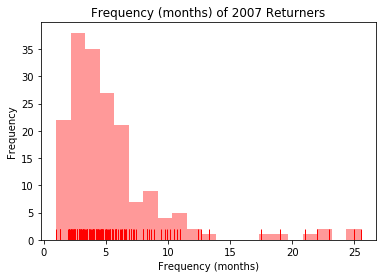

In [22]:
sns.distplot(tran_2007.frequency, kde=False, rug=True, color='red')
plt.title('Frequency (months) of 2007 Returners')
plt.xlabel('Frequency (months)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

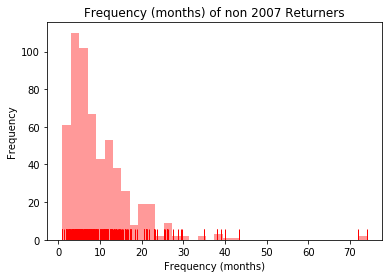

In [23]:
sns.distplot(tran_no2007.frequency, kde=False, rug=True, color='red')
plt.title('Frequency (months) of non 2007 Returners')
plt.xlabel('Frequency (months)')
plt.ylabel('Frequency')

In [24]:
# Checking the max frequency for those who returned.
tran_2007.frequency.max()

25.5

The mean frequencies are different when split between the returners and the non. So, frequency could possibly be a strong predictor. Any individual who returned in March 2007 had a frequency less than or equal to 25.5 months.

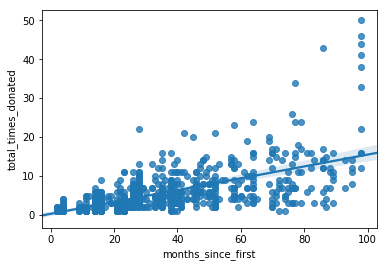

In [25]:
sns.regplot(x=tran.months_since_first, y=tran.total_times_donated)

Text(0.5, 0, 'Months Since First Visit')

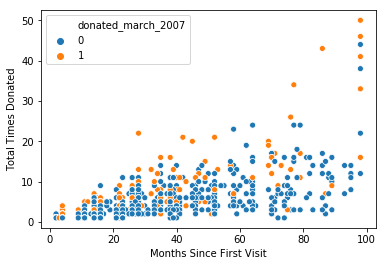

In [29]:
fig = sns.scatterplot(x=tran.months_since_first, y=tran.total_times_donated, hue=tran.donated_march_2007)
plt.ylabel("Total Times Donated")
plt.xlabel("Months Since First Visit")

In [27]:
tran_2007[tran_2007.frequency > 20]

,months_since_first,months_since_last,total_times_donated,total_cc_blood_donated,donated_march_2007,frequency
370,51,4,2,500,1,25.5
462,21,21,1,250,1,21.0
468,22,22,1,250,1,22.0
669,75,2,3,750,1,25.0
732,23,23,1,250,1,23.0


### Thoughts
As total blood is a product of time due to the tight control on amount of blood donated per visit, analysis should look specifically at frequency of visits and time since that last visit. This makes intuitive sense as those who return often are more likely to return again, and most individuals give time between donations in order to stay healthy. As the dependent variable (donated_march_2007) is a two-level categorical variable, a logistic regression will be attempted initially.

In [28]:
# instead of predicting a continuous value you're predicting a probability of a 1 or 0
# ex: mortality in hospital, standard thresh is 50%, as an example if you have someone with 51% is it really that likely?
# try and minimize the amount of strings of code cells